In [1]:
import os

import xarray as xr
import matplotlib.pyplot as plt
import ncar_jobqueue
from numpy.polynomial import polynomial as P

import data_catalog
import esmlab_wrap
import tseries_mod
from utils import time_year_plus_frac

In [2]:
data_catalog.set_catalog('experiments')
varnames = ['DIC_vertint', 'DOC_vertint', 'DOCr_vertint']
regions = ['Global']

active catalog: experiments


In [3]:
clobber = os.environ['CLOBBER'] == 'True' if 'CLOBBER' in os.environ else False
cluster = ncar_jobqueue.NCARCluster() if clobber else None

In [4]:
def Cinv_ocn_drift_summary(experiment):
    ds = tseries_mod.tseries_get_vars(varnames, 'ocn', experiment, cluster_in=cluster)
    ds_ann = esmlab_wrap.compute_ann_mean(ds)
    for region in regions:
        for varname in varnames:
            title = ' '.join([experiment, varname, region])
            tseries_mod.tseries_plot_1ds(ds_ann, [varname], title=title, region_val=region)
            t = time_year_plus_frac(ds_ann, 'time')
            y = ds_ann[varname].sel(region=region).values
            print(P.polyfit(t, y, 1))

[ 3.71152898e+04 -4.46037183e-02]
[2.34169656e+01 5.73033209e-05]
[ 3.56767379e+02 -4.62780706e-04]


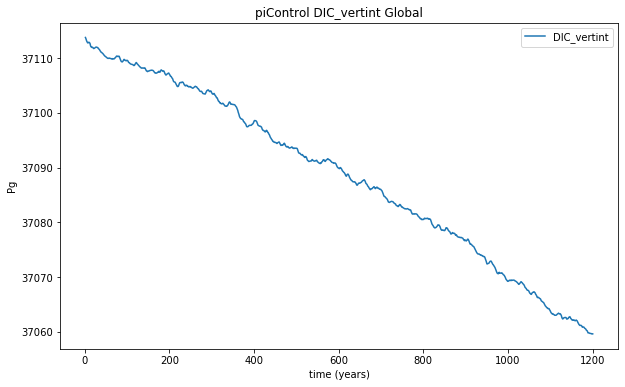

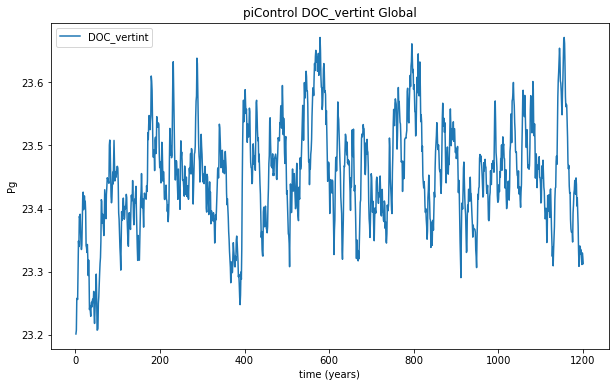

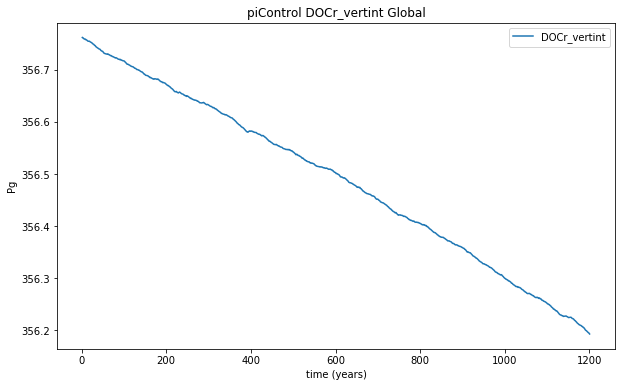

In [5]:
Cinv_ocn_drift_summary(experiment='piControl')

[ 3.71117825e+04 -5.68271968e-02]
[2.33042966e+01 1.58426290e-04]
[ 3.56759014e+02 -4.12248037e-04]


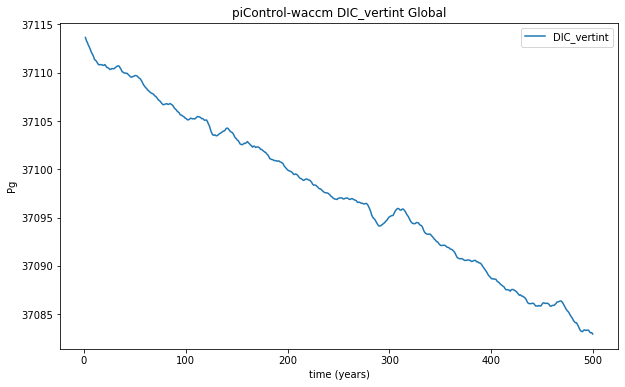

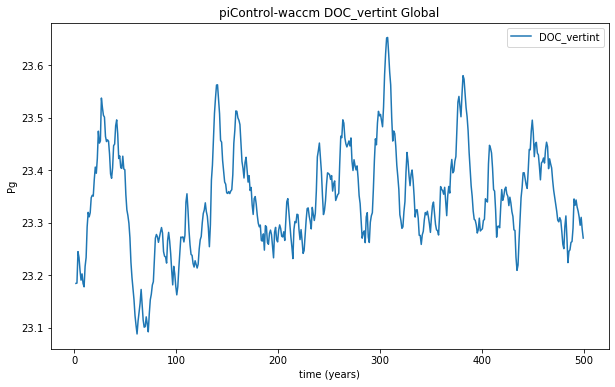

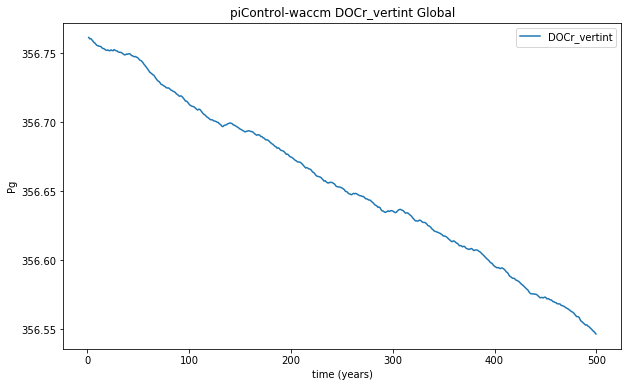

In [6]:
Cinv_ocn_drift_summary(experiment='piControl-waccm')

[ 3.70911705e+04 -1.52327483e-02]
[ 2.34769373e+01 -4.64607777e-05]
[ 3.56497095e+02 -4.79402820e-04]


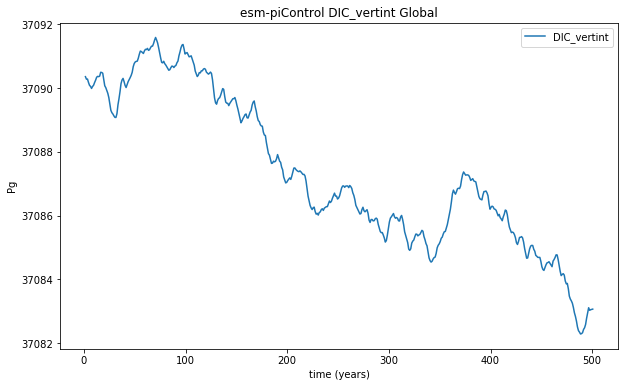

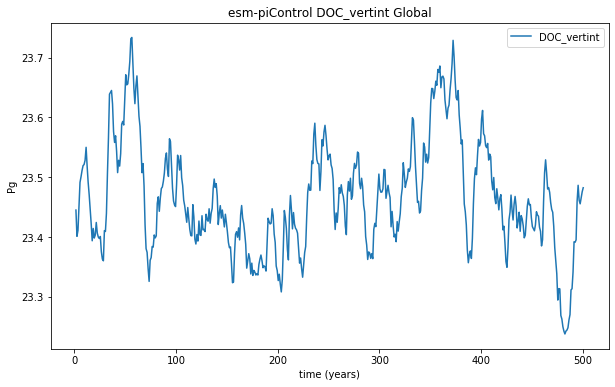

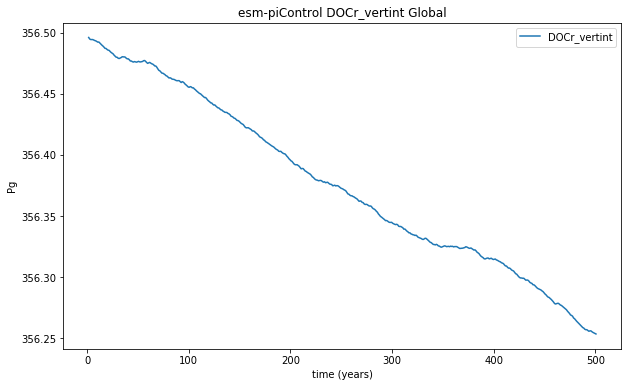

In [7]:
Cinv_ocn_drift_summary(experiment='esm-piControl')

In [8]:
if clobber:
    cluster.close()